In [44]:
import os
dir_list = os.listdir('D:/archive/Train')

In [45]:
loc = []
char_folder = []
for i in dir_list:
    loc.append('D:/archive/Train/'+i)
    char_folder.append(i)
print(loc)
print(char_folder)

['D:/archive/Train/#', 'D:/archive/Train/$', 'D:/archive/Train/&', 'D:/archive/Train/@', 'D:/archive/Train/A', 'D:/archive/Train/B', 'D:/archive/Train/D', 'D:/archive/Train/W', 'D:/archive/Train/X', 'D:/archive/Train/Y', 'D:/archive/Train/Z']
['#', '$', '&', '@', 'A', 'B', 'D', 'W', 'X', 'Y', 'Z']


In [46]:
char_and_loc = sorted(list(zip(char_folder,loc)))
char_and_loc

[('#', 'D:/archive/Train/#'),
 ('$', 'D:/archive/Train/$'),
 ('&', 'D:/archive/Train/&'),
 ('@', 'D:/archive/Train/@'),
 ('A', 'D:/archive/Train/A'),
 ('B', 'D:/archive/Train/B'),
 ('D', 'D:/archive/Train/D'),
 ('W', 'D:/archive/Train/W'),
 ('X', 'D:/archive/Train/X'),
 ('Y', 'D:/archive/Train/Y'),
 ('Z', 'D:/archive/Train/Z')]

In [47]:
from tqdm import tqdm
import cv2
features = []
labels = []
for i in range(len(char_and_loc)):
    char = char_and_loc[i][0]
    add = char_and_loc[i][1]
    count = 0
    for l in tqdm(os.listdir(add)):
        f = cv2.imread(os.path.join(add,l),0)
        fr = cv2.resize(f,(50,50))
        features.append(fr)
        labels.append(char)

100%|████████████████████████████████████████████████████████████████████████████| 4867/4867 [00:02<00:00, 2082.24it/s]


In [5]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
X = np.array(features)
X.shape

(148189, 50, 50)

In [49]:
Y = np.array(labels)
Y.shape

(148189,)

In [50]:
import pandas as pd

Ft = pd.DataFrame(X.reshape(148189,2500))
Lt = pd.DataFrame(Y.reshape(148189,1),columns=['Labels'])

digits = pd.concat((Lt,Ft),axis='columns')

#digits.to_csv('train_character.csv')

In [51]:
Xt = Ft.values
Yt = Lt.values

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(max_depth=20,)
rmodel.fit(xtrain,ytrain)
print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest,ytest))

<ipython-input-53-94e76d6c5134>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rmodel.fit(xtrain,ytrain)


0.9994691428005866
0.9826171453249838


In [54]:
import pickle
filename = 'character_randomforest.sav'
pickle.dump(rmodel, open(filename, 'wb'))

# Neural Networking

In [55]:
from keras import models
from keras import layers

In [56]:
model = models.Sequential()
model.add(layers.Dense(256 , activation='relu' , input_dim=xtrain.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(91 , activation='softmax'))

In [57]:
temp1 = ytrain.reshape(111141)
temp2 = ytest.reshape(37048)

In [58]:
ytrain_ascii_1=[]
for i in temp1:
    k = ord(i)
    ytrain_ascii_1.append(k)
print(ytrain_ascii_1)
ytrain_ascii_1 = np.array(ytrain_ascii_1)
ytrain_ascii_1 = ytrain_ascii_1.reshape(111141, 1)
ytrain_ascii_1.shape

[35, 66, 64, 68, 64, 87, 89, 64, 36, 35, 68, 64, 36, 66, 64, 65, 36, 66, 36, 64, 65, 88, 36, 64, 36, 38, 64, 89, 36, 68, 64, 68, 66, 64, 64, 90, 64, 35, 68, 90, 87, 36, 66, 35, 89, 65, 38, 64, 90, 89, 68, 64, 38, 35, 65, 64, 65, 35, 35, 38, 68, 88, 36, 64, 64, 36, 90, 38, 35, 90, 66, 65, 36, 64, 64, 66, 64, 89, 35, 64, 66, 64, 64, 64, 65, 64, 36, 65, 35, 89, 89, 65, 64, 35, 36, 64, 90, 68, 36, 36, 64, 65, 68, 64, 68, 65, 35, 65, 68, 66, 36, 68, 64, 64, 38, 64, 36, 38, 35, 38, 65, 64, 64, 64, 65, 87, 65, 88, 87, 64, 35, 35, 90, 65, 66, 64, 65, 64, 64, 36, 64, 35, 87, 88, 36, 36, 64, 65, 35, 68, 64, 68, 68, 36, 64, 35, 65, 90, 64, 38, 38, 66, 64, 65, 64, 65, 36, 38, 64, 64, 66, 87, 89, 68, 65, 64, 65, 35, 36, 68, 35, 68, 64, 65, 64, 65, 89, 68, 68, 36, 35, 64, 65, 36, 88, 36, 64, 68, 68, 64, 65, 35, 64, 89, 38, 64, 64, 65, 38, 35, 65, 65, 68, 36, 64, 36, 35, 64, 65, 68, 64, 35, 35, 38, 68, 65, 35, 36, 35, 64, 38, 64, 64, 65, 64, 68, 36, 35, 36, 68, 36, 87, 38, 64, 65, 36, 66, 90, 35, 66,

(111141, 1)

In [59]:
ytest_ascii_1=[]
for i in temp2:
    k2 = ord(i)
    ytest_ascii_1.append(k2)
print(ytest_ascii_1)
ytest_ascii_1 = np.array(ytest_ascii_1)
ytest_ascii_1  = ytest_ascii_1.reshape(37048, 1)
ytest_ascii_1.shape

[88, 64, 65, 68, 38, 65, 35, 65, 38, 36, 64, 64, 35, 68, 90, 38, 87, 88, 87, 36, 65, 87, 64, 68, 68, 90, 65, 66, 36, 64, 68, 66, 35, 90, 38, 88, 38, 35, 66, 38, 64, 64, 68, 36, 66, 35, 64, 35, 64, 88, 90, 64, 64, 68, 64, 89, 38, 36, 64, 65, 66, 64, 64, 64, 68, 35, 64, 64, 38, 64, 68, 38, 68, 36, 64, 36, 89, 64, 64, 36, 64, 90, 38, 64, 87, 89, 65, 66, 35, 68, 88, 68, 38, 87, 65, 38, 87, 65, 89, 38, 65, 68, 36, 35, 36, 87, 64, 88, 87, 36, 64, 68, 38, 90, 36, 36, 68, 89, 64, 38, 35, 65, 38, 64, 38, 66, 38, 35, 64, 65, 64, 65, 64, 66, 68, 64, 68, 36, 87, 35, 64, 38, 64, 64, 35, 38, 88, 66, 64, 35, 87, 89, 87, 36, 89, 38, 66, 64, 89, 64, 38, 64, 65, 64, 87, 35, 64, 66, 35, 64, 36, 36, 87, 64, 64, 64, 38, 35, 64, 36, 35, 38, 64, 64, 64, 64, 35, 65, 35, 35, 65, 65, 90, 36, 89, 64, 87, 38, 36, 65, 65, 38, 38, 36, 68, 64, 89, 35, 64, 38, 64, 87, 38, 87, 64, 68, 64, 68, 38, 35, 35, 90, 35, 66, 89, 64, 89, 88, 36, 35, 64, 65, 35, 90, 64, 65, 68, 64, 35, 38, 64, 38, 64, 38, 88, 88, 87, 68, 36, 35,

(37048, 1)

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               640256    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 91)               

In [61]:
from keras import optimizers
from keras import metrics

In [62]:
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [63]:
from keras.utils import np_utils
ytrain_h = np_utils.to_categorical(ytrain_ascii_1)

In [64]:
xtrain_n = xtrain/xtrain.max()
ytrain_h.shape

(111141, 91)

In [65]:
xtest_n = xtest/xtest.max()
ytest_h = np_utils.to_categorical(ytest_ascii_1)
ytest_h.shape

(37048, 91)

In [66]:
model.fit(xtrain_n,ytrain_h,epochs=100,validation_data = (xtest_n,ytest_h))

Epoch 1/100
3474/3474 [==============================] - 24s 7ms/step - loss: 1.0960 - accuracy: 0.6823 - val_loss: 0.1738 - val_accuracy: 0.9494
Epoch 2/100
3474/3474 [==============================] - 21s 6ms/step - loss: 0.2120 - accuracy: 0.9374 - val_loss: 0.1058 - val_accuracy: 0.9689
Epoch 3/100
3474/3474 [==============================] - 20s 6ms/step - loss: 0.1438 - accuracy: 0.9574 - val_loss: 0.0838 - val_accuracy: 0.9756
Epoch 4/100
3474/3474 [==============================] - 20s 6ms/step - loss: 0.1159 - accuracy: 0.9664 - val_loss: 0.0725 - val_accuracy: 0.9793
Epoch 5/100
3474/3474 [==============================] - 20s 6ms/step - loss: 0.0954 - accuracy: 0.9725 - val_loss: 0.0652 - val_accuracy: 0.9815
Epoch 6/100
3474/3474 [==============================] - 20s 6ms/step - loss: 0.0850 - accuracy: 0.9747 - val_loss: 0.0617 - val_accuracy: 0.9826
Epoch 7/100
3474/3474 [==============================] - 20s 6ms/step - loss: 0.0782 - accuracy: 0.9771 - val_loss: 0.0575 -

3474/3474 [==============================] - 19s 5ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0412 - val_accuracy: 0.9906
Epoch 57/100
3474/3474 [==============================] - 18s 5ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0420 - val_accuracy: 0.9908
Epoch 58/100
3474/3474 [==============================] - 17s 5ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0435 - val_accuracy: 0.9906
Epoch 59/100
3474/3474 [==============================] - 17s 5ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0429 - val_accuracy: 0.9901
Epoch 60/100
3474/3474 [==============================] - 17s 5ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0413 - val_accuracy: 0.9907
Epoch 61/100
3474/3474 [==============================] - 18s 5ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0421 - val_accuracy: 0.9903
Epoch 62/100
3474/3474 [==============================] - 18s 5ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0417 - val_a

In [67]:
print(model.evaluate(xtrain_n,ytrain_h))
print(model.evaluate(xtest_n,ytest_h))

3474/3474 [==============================] - 7s 2ms/step - loss: 0.0018 - accuracy: 0.9996
[0.0017610781360417604, 0.9995951056480408]
1158/1158 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9911
[0.04284022003412247, 0.9910926222801208]


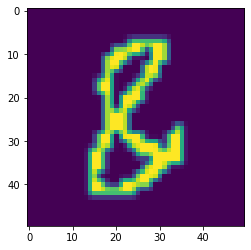

In [68]:
import matplotlib.pyplot as plt
plt.imshow(xtest[56].reshape(50,50))
plt.show()

In [69]:
print(rmodel.predict([xtest[56]]))

['&']


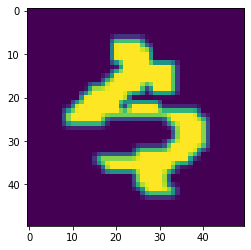

In [70]:
plt.imshow(xtest[102].reshape(50,50))
plt.show()

In [71]:
print(rmodel.predict([xtest[102]]))

['$']


In [72]:
ytrain_predict=rmodel.predict(xtrain)
ytest_predict=rmodel.predict(xtest)

In [73]:
from sklearn.metrics import confusion_matrix

# ytrain_pred = kmodel.predict(xtrain)
# ytest_pred = kmodel.predict(xtest)

cm_train = confusion_matrix(ytrain,ytrain_predict)
cm_test = confusion_matrix(ytest,ytest_predict)

In [74]:
print(cm_test)
print()
print(cm_train)

[[3802    0    0    0    0    0    0    0    0    0    0]
 [   0 4069    0    0    0    0    0    0    0    0    0]
 [   0    0 3236    0    0    0    0    0    0    0    0]
 [   0    0    0 9504    0    0    1    0    0    0    0]
 [   0    0    0    2 4153   28   50   11    2    3   12]
 [   0    0    0    1   71 2098   40    5    2    1    7]
 [   0    0    0    0   87   39 3804    6    3    4    1]
 [   0    0    0    1   14    8   12 1747    3    0    0]
 [   0    0    0    0   31    6    1    2 1212   35   12]
 [   0    0    0    1   13   17   22   13    6 1635    0]
 [   0    0    0    2   29   10    9    0   12    9 1144]]

[[11798     0     0     0     0     0     0     0     0     0     0]
 [    0 12130     0     0     0     0     0     0     0     0     0]
 [    0     0  9764     0     0     0     0     0     0     0     0]
 [    0     0     0 28504     0     0     0     0     0     0     0]
 [    0     0     0     0 12936     0     8     0     0     0     0]
 [    0     0  

In [75]:
model.save('character_neuealnetwork.h5')

In [38]:
%pwd

'C:\\Users\\Yash\\Hand Written'